In [44]:
#importing required packages

#for text
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
from string  import punctuation
from nltk.collocations import *
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
from nltk.probability  import FreqDist
from heapq import nlargest
from collections import defaultdict


#for donwload the webpage

import requests
import webbrowser
from bs4 import BeautifulSoup
import httplib2
import httpbin
import requests
import httplib2
import urllib
import pandas as pd
import numpy as np
import webbrowser
from pprint import pprint
import json 

#for sentiments analysis

import twitter
import json
from collections import Counter
import os 
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package vader_lexicon to C:\Users\Alejandro
[nltk_data]     Perez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# URL

In [37]:
nattule_url = 'https://web.nattule.com/es/'

In [38]:
http = httplib2.Http()

# Extracción de head y body html de cada página

In [39]:
resp_nattule, data_nattule = http.request(nattule_url)

In [40]:
# Codificando el html - body

nattule_html = data_nattule.decode('UTF-8')

# Limpieza de  codigo html

soup_nattule = BeautifulSoup(nattule_html)

In [41]:
text = ' '.join(map(lambda p: p.text, soup_nattule.find_all(['p', 'span', 'h1', 'h2', 'h3', 'h4', 'li' 'ul'])))
text

' Comienza ahora #1 Agencia de Marketing Digital en turismo de naturaleza Hacemos de tu marca una aventura Objetivo: que tu destino de naturaleza sea objeto de deseo   Sabemos de marketing digital(y también de turismo de naturaleza) Sabemos de marketing digital (y también de turismo de naturaleza) \nLo tenemos muy claro. No queremos medias tintas, somos una agencia de publicidad y marketing digital con un alto grado de especialización: el turismo de naturaleza Nuestros clientes opinan Nuestros clientes opinan “Pusieron en marcha nuestra marca en el mundo online. Son pioneros en el sector del ecoturismo y ejecutan lo que hacen con gran profesionalidad” Tony Gill · Destino turístico El Tranco Nuestro proyecto “Diseñaron, maquetaron y desarrollaron nuestro proyecto en tiempo récord. Es muy difícil encontrar un equipo de expertos multidisciplinar tan bien conjuntado” Carl Stromberg · WWF Mira aquí “Son expertos en turismo de naturaleza, y eso se nota en el resultado final. No hay duda de q

In [29]:
text.encode('ascii', errors='replace').replace(b"?", b" ")

b' Comienza ahora #1 Agencia de Marketing Digital en turismo de naturaleza Hacemos de tu marca una aventura Objetivo: que tu destino de naturaleza sea objeto de deseo   Sabemos de marketing digital(y tambi n de turismo de naturaleza) Sabemos de marketing digital (y tambi n de turismo de naturaleza) \nLo tenemos muy claro. No queremos medias tintas, somos una agencia de publicidad y marketing digital con un alto grado de especializaci n: el turismo de naturaleza Nuestros clientes opinan Nuestros clientes opinan  Pusieron en marcha nuestra marca en el mundo online. Son pioneros en el sector del ecoturismo y ejecutan lo que hacen con gran profesionalidad  Tony Gill   Destino tur stico El Tranco Nuestro proyecto  Dise aron, maquetaron y desarrollaron nuestro proyecto en tiempo r cord. Es muy dif cil encontrar un equipo de expertos multidisciplinar tan bien conjuntado  Carl Stromberg   WWF Mira aqu   Son expertos en turismo de naturaleza, y eso se nota en el resultado final. No hay duda de 

In [30]:
sents = sent_tokenize(text)
sents

[' Comienza ahora #1 Agencia de Marketing Digital en turismo de naturaleza Hacemos de tu marca una aventura Objetivo: que tu destino de naturaleza sea objeto de deseo   Sabemos de marketing digital(y también de turismo de naturaleza) Sabemos de marketing digital (y también de turismo de naturaleza) \nLo tenemos muy claro.',
 'No queremos medias tintas, somos una agencia de publicidad y marketing digital con un alto grado de especialización: el turismo de naturaleza Nuestros clientes opinan Nuestros clientes opinan “Pusieron en marcha nuestra marca en el mundo online.',
 'Son pioneros en el sector del ecoturismo y ejecutan lo que hacen con gran profesionalidad” Tony Gill · Destino turístico El Tranco Nuestro proyecto “Diseñaron, maquetaron y desarrollaron nuestro proyecto en tiempo récord.',
 'Es muy difícil encontrar un equipo de expertos multidisciplinar tan bien conjuntado” Carl Stromberg · WWF Mira aquí “Son expertos en turismo de naturaleza, y eso se nota en el resultado final.',
 

In [31]:
word_sent = word_tokenize(text.lower())
word_sent

['comienza',
 'ahora',
 '#',
 '1',
 'agencia',
 'de',
 'marketing',
 'digital',
 'en',
 'turismo',
 'de',
 'naturaleza',
 'hacemos',
 'de',
 'tu',
 'marca',
 'una',
 'aventura',
 'objetivo',
 ':',
 'que',
 'tu',
 'destino',
 'de',
 'naturaleza',
 'sea',
 'objeto',
 'de',
 'deseo',
 'sabemos',
 'de',
 'marketing',
 'digital',
 '(',
 'y',
 'también',
 'de',
 'turismo',
 'de',
 'naturaleza',
 ')',
 'sabemos',
 'de',
 'marketing',
 'digital',
 '(',
 'y',
 'también',
 'de',
 'turismo',
 'de',
 'naturaleza',
 ')',
 'lo',
 'tenemos',
 'muy',
 'claro',
 '.',
 'no',
 'queremos',
 'medias',
 'tintas',
 ',',
 'somos',
 'una',
 'agencia',
 'de',
 'publicidad',
 'y',
 'marketing',
 'digital',
 'con',
 'un',
 'alto',
 'grado',
 'de',
 'especialización',
 ':',
 'el',
 'turismo',
 'de',
 'naturaleza',
 'nuestros',
 'clientes',
 'opinan',
 'nuestros',
 'clientes',
 'opinan',
 '“',
 'pusieron',
 'en',
 'marcha',
 'nuestra',
 'marca',
 'en',
 'el',
 'mundo',
 'online',
 '.',
 'son',
 'pioneros',
 'en',
 

In [84]:
constomStopWords = set(stopwords.words('spanish') + list(punctuation))

constomStopWords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste

In [85]:
word_sent=[word for word in word_sent if word not in constomStopWords]
word_sent

['comienza',
 'ahora',
 '1',
 'agencia',
 'marketing',
 'digital',
 'turismo',
 'naturaleza',
 'hacemos',
 'marca',
 'aventura',
 'objetivo',
 'destino',
 'naturaleza',
 'objeto',
 'deseo',
 'sabemos',
 'marketing',
 'digital',
 'turismo',
 'naturaleza',
 'sabemos',
 'marketing',
 'digital',
 'turismo',
 'naturaleza',
 'claro',
 'queremos',
 'medias',
 'tintas',
 'agencia',
 'publicidad',
 'marketing',
 'digital',
 'alto',
 'grado',
 'especialización',
 'turismo',
 'naturaleza',
 'clientes',
 'opinan',
 'clientes',
 'opinan',
 '“',
 'pusieron',
 'marcha',
 'marca',
 'mundo',
 'online',
 'pioneros',
 'sector',
 'ecoturismo',
 'ejecutan',
 'hacen',
 'gran',
 'profesionalidad',
 '”',
 'tony',
 'gill',
 '·',
 'destino',
 'turístico',
 'tranco',
 'proyecto',
 '“',
 'diseñaron',
 'maquetaron',
 'desarrollaron',
 'proyecto',
 'tiempo',
 'récord',
 'difícil',
 'encontrar',
 'equipo',
 'expertos',
 'multidisciplinar',
 'tan',
 'bien',
 'conjuntado',
 '”',
 'carl',
 'stromberg',
 '·',
 'wwf',
 '

In [93]:
noWords = ['”', '“', '·' , 'and', '1', '2', '7']
freq_list = [word for word in freq if word not in noWords]
freq_list

['naturaleza',
 'marketing',
 'turismo',
 'digital',
 'destino',
 'proyecto',
 'expertos',
 'aquí',
 'it',
 'to',
 'marca',
 'clientes',
 'online',
 'turístico',
 'servicios',
 'aventuramos',
 'ahora',
 'agencia',
 'sabemos',
 'opinan',
 'pusieron',
 'marcha',
 'mundo',
 'pioneros',
 'sector',
 'ecoturismo',
 'ejecutan',
 'hacen',
 'gran',
 'profesionalidad',
 'tony',
 'gill',
 'tranco',
 'diseñaron',
 'maquetaron',
 'desarrollaron',
 'tiempo',
 'récord',
 'difícil',
 'encontrar',
 'equipo',
 'multidisciplinar',
 'tan',
 'bien',
 'conjuntado',
 'carl',
 'stromberg',
 'wwf',
 'mira',
 'nota',
 'resultado',
 'final',
 'duda',
 'seguiremos',
 'contando',
 'chelsea',
 'stratso',
 'european',
 'environment',
 'agency',
 'ver',
 'this',
 'app',
 'does',
 'everything',
 'you',
 'could',
 'possibly',
 'want',
 'do',
 'not',
 'only',
 'that',
 'is',
 'beautifully',
 'designed',
 'extremely',
 'intuitive',
 'use',
 'visitante',
 'email',
 'protected',
 'comienza',
 'hacemos',
 'aventura',
 'obje

In [94]:
freq = FreqDist(freq_list)
freq

FreqDist({'naturaleza': 1, 'marketing': 1, 'turismo': 1, 'digital': 1, 'destino': 1, 'proyecto': 1, 'expertos': 1, 'aquí': 1, 'it': 1, 'to': 1, ...})

In [95]:
nlargest(10, freq_list, key=freq.get)

['naturaleza',
 'marketing',
 'turismo',
 'digital',
 'destino',
 'proyecto',
 'expertos',
 'aquí',
 'it',
 'to']

In [96]:
ranking = defaultdict(int)

for i,sent in enumerate(sents):
    for w in word_tokenize(sent.lower()):
        if w in freq:
            ranking[i] += freq[w]
            
ranking

defaultdict(int,
            {0: 26,
             1: 21,
             2: 19,
             3: 19,
             4: 16,
             5: 19,
             6: 19,
             7: 49,
             8: 22,
             9: 1,
             10: 16,
             11: 12,
             12: 2,
             13: 26})

In [97]:
sents_idx = nlargest(4, ranking, key=ranking.get)
sents_idx

[7, 0, 13, 8]

In [98]:
[sents[j] for j in sorted(sents_idx)]

[' Comienza ahora #1 Agencia de Marketing Digital en turismo de naturaleza Hacemos de tu marca una aventura Objetivo: que tu destino de naturaleza sea objeto de deseo   Sabemos de marketing digital(y también de turismo de naturaleza) Sabemos de marketing digital (y también de turismo de naturaleza) \nLo tenemos muy claro.',
 'No hay duda de que seguiremos contando con sus servicios” Chelsea Stratso · European Environment Agency Ver aquí Nos aventuramos con Servicios  Marketing digital  Branding  Visual content  Presencia online  Proyectos de emprendimiento  Influencer marketing Algunos de nuestros clientes Nos aventuramos con Nos aventuramos con This app does everything you could possibly want it to do and not only that, it is beautifully and designed and extremely intuitive to use.',
 'This app does everything you could possibly want it to do and not only that, it is beautifully and designed and extremely intuitive to use.',
 'Oficinas C/Alicates, 2, 41008 Sevilla (España)\n1422, 7 St

In [99]:
def summarize(text, n):
    sents = sent_tokenize(text)
    
    assert n <= len(sents)
    word_sent = word_tokenize(text.lower())
    _stopwords = set(stopwords.words('english') + list(punctuation))
    
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    
    
    ranking = defaultdict(int)
    
    for i,sent in enumerate(sents):
        for w in word_tokenize(sent.lower()):
            if w in freq:
                ranking[i] += freq[w]
             
        
    sents_idx = nlargest(n, ranking, key=ranking.get)
    return [sents[j] for j in sorted(sents_idx)]

In [106]:
summarize(text,3)

[' Comienza ahora #1 Agencia de Marketing Digital en turismo de naturaleza Hacemos de tu marca una aventura Objetivo: que tu destino de naturaleza sea objeto de deseo   Sabemos de marketing digital(y también de turismo de naturaleza) Sabemos de marketing digital (y también de turismo de naturaleza) \nLo tenemos muy claro.',
 'No queremos medias tintas, somos una agencia de publicidad y marketing digital con un alto grado de especialización: el turismo de naturaleza Nuestros clientes opinan Nuestros clientes opinan “Pusieron en marcha nuestra marca en el mundo online.',
 'No hay duda de que seguiremos contando con sus servicios” Chelsea Stratso · European Environment Agency Ver aquí Nos aventuramos con Servicios  Marketing digital  Branding  Visual content  Presencia online  Proyectos de emprendimiento  Influencer marketing Algunos de nuestros clientes Nos aventuramos con Nos aventuramos con This app does everything you could possibly want it to do and not only that, it is beautifully a

In [32]:
import twitter
import json
from collections import Counter
import os 
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from collections import Counter
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer



data_folder = os.path.join(os.path.expanduser("~"), "Data", "twitter")
output_filename = os.path.join(data_folder, "python_tweets.json")
# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = 'soYOytOxNqM3iOTqAeIbxnlDX'
CONSUMER_SECRET = 'AMMUddKaTwR6Y8VehQmVnH1jKPHBSMEvG31W7OjWYrl3tiqXkR'
OAUTH_TOKEN = '1429859845545631749-kZgY0wLEpKLsCqrRe6BTwK0IfcIxc8'
OAUTH_TOKEN_SECRET = 'ZXqMhYZ3F9d97RyAZMuI2e2myCb3cCdXf462ToXmDG9sB'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)



[nltk_data] Downloading package vader_lexicon to C:\Users\Alejandro
[nltk_data]     Perez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
iniciartwitter

<function __main__.iniciartwitter()>

In [34]:
# listas de busqueda


tweets = []
original_users = [] 
tweets_turismo_digital = []
tweets_naturaleza = []
tweets_marketing_digital = []
tweets_marketing = []
tweets_turismo = []
user_ids = {}

In [46]:
#analizer 

analyzer = SentimentIntensityAnalyzer()



key_1 = "marketing digital"
key_2 = "marketing"
key_3 = "turismo digital"
key_4 = "turismo"
key_5 = "naturaleza"

#tweets_download_keyword_marketing_digital

count = 1000
query = "key_1"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")

tweetsWithSent = []
for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_marketing_digital.append({'text':text, 'compound':ps['compound']})


#tweets_download_keyword_marketing


count = 1000
query = "key_2"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_marketing.append({'text':text, 'compound':ps['compound']})
    
    

#tweets_download_keyword_turismo_digital

count = 1000
query = "key_3"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_turismo_digital.append({'text':text, 'compound':ps['compound']})
    
#tweets_download_keyword_turismo

count = 1000
query = "key_4"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_turismo.append({'text':text, 'compound':ps['compound']})


#tweets_download_keyword_turismo


count = 1000
query = "key_5"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='es',tweet_mode="extended")


for t in tweets['statuses']:
    text = (t['full_text'])
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text':text, 'compound':ps['compound']})
    tweets_naturaleza.append({'text':text, 'compound':ps['compound']})





In [105]:
#creando las tablas

tweetdf_turismo_digital = pd.DataFrame(tweets_turismo_digital)

tweetdf_marketing_digital = pd.DataFrame(tweets_marketing_digital)

tweetdf_marketing = pd.DataFrame(tweets_marketing)

tweetdf_naturaleza = pd.DataFrame(tweets_naturaleza)

tweetdf_turismo = pd.DataFrame(tweets_turismo)



In [181]:
#Cambiando nombres

tweetdf_marketing_digital.rename(columns={'text' : 'tweets_marketing_digital' , 'compound':'compound_marketing_digital' }, inplace=True)
tweetdf_turismo_digital.rename(columns={'text' : 'tweets_turismo_digital' , 'compound':'compound_turismo_digital' }, inplace=True)
tweetdf_marketing.rename(columns={'text' : 'tweets_marketing' , 'compound':'compound_marketing' }, inplace=True)
tweetdf_naturaleza.rename(columns={'text' : 'tweets_naturaleza' , 'compound':'compound_naturaleza' }, inplace=True)
tweetdf_turismo.rename(columns={'text' : 'tweets_turismo' , 'compound':'compound_turismo' }, inplace=True)


# Convert scores into positive and negetive sentiments using some threshold
tweetdf_marketing_digital['Sentiment'] = np.where(tweetdf_marketing_digital['compound_marketing_digital'] >= 0 , 'Positive', 'Negative')
tweetdf_turismo_digital['Sentiment'] = np.where(tweetdf_turismo_digital['compound_turismo_digital'] >= 0 , 'Positive', 'Negative')
tweetdf_marketing['Sentiment'] = np.where(tweetdf_marketing['compound_marketing'] >= 0 , 'Positive', 'Negative')
tweetdf_naturaleza['Sentiment'] = np.where(tweetdf_naturaleza['compound_naturaleza'] >= 0 , 'Positive', 'Negative')
tweetdf_turismo['Sentiment'] = np.where(tweetdf_turismo['compound_turismo'] >= 0 , 'Positive', 'Negative')


,tweets_marketing_digital,compound_marketing_digital,Sentiment
0,Actualizada: Construcción prevista en Condado ...,0.4767,Positive
1,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
2,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
3,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
4,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
...,...,...,...
95,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
96,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
97,"RT @ShoisTiny: Esque neta que soy buenísimo, n...",-0.2960,Negative
98,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive


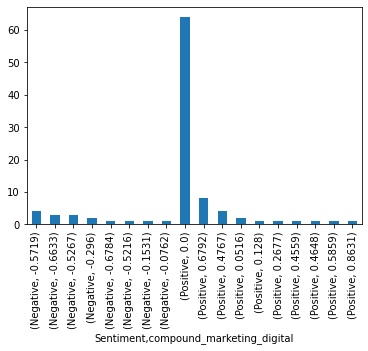

In [182]:


#Sample code snippet
#result=tweetdf_marketing_digital.groupby('compound_marketing_digital')['Sentiment'].value_counts().unstack()
#result[['Negative','Positive']].plot(kind='bar', 
#stacked=True, color='rb')

result=tweetdf_marketing_digital.groupby('Sentiment')['compound_marketing_digital'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_marketing_digital


,tweets_marketing_digital,compound_marketing_digital,Sentiment
0,Actualizada: Construcción prevista en Condado ...,0.4767,Positive
1,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
2,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
3,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
4,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
...,...,...,...
95,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
96,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
97,"RT @ShoisTiny: Esque neta que soy buenísimo, n...",-0.2960,Negative
98,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive


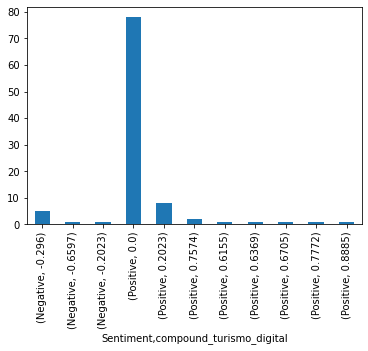

In [183]:
result=tweetdf_turismo_digital.groupby('Sentiment')['compound_turismo_digital'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_marketing_digital

,tweets_marketing_digital,compound_marketing_digital,Sentiment
0,Actualizada: Construcción prevista en Condado ...,0.4767,Positive
1,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
2,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
3,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
4,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
...,...,...,...
95,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
96,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
97,"RT @ShoisTiny: Esque neta que soy buenísimo, n...",-0.2960,Negative
98,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive


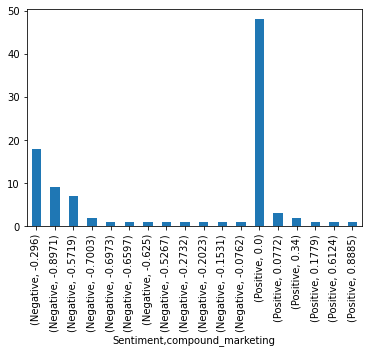

In [185]:
result=tweetdf_marketing.groupby('Sentiment')['compound_marketing'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_marketing_digital

,tweets_marketing_digital,compound_marketing_digital,Sentiment
0,Actualizada: Construcción prevista en Condado ...,0.4767,Positive
1,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
2,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
3,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
4,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
...,...,...,...
95,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
96,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
97,"RT @ShoisTiny: Esque neta que soy buenísimo, n...",-0.2960,Negative
98,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive


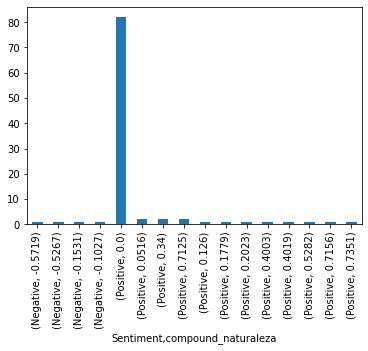

In [186]:
result=tweetdf_naturaleza.groupby('Sentiment')['compound_naturaleza'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_marketing_digital

,tweets_marketing_digital,compound_marketing_digital,Sentiment
0,Actualizada: Construcción prevista en Condado ...,0.4767,Positive
1,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
2,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
3,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
4,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
...,...,...,...
95,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
96,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive
97,"RT @ShoisTiny: Esque neta que soy buenísimo, n...",-0.2960,Negative
98,RT @cryforjinki: SHAWOL‼️\nHice otra tanda de ...,0.0000,Positive


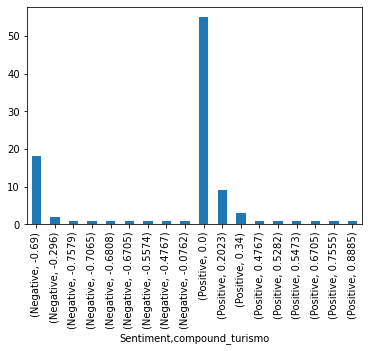

In [187]:
result=tweetdf_turismo.groupby('Sentiment')['compound_turismo'].value_counts()


ax = result.plot.bar(stacked=True)

tweetdf_marketing_digital